In [468]:
import pandas as pd
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import preprocessing
from sklearn import metrics as skmet
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time
from scipy.stats.stats import pearsonr
import itertools
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
pd.set_option('display.expand_frame_repr', False)
%matplotlib inline

In [469]:
balls_data=pd.read_csv('balls.txt', sep=",", header=None)
balls_data.columns = ["X", "Y", "class"]
balls_data=balls_data.drop(0).reset_index(drop=True)
balls_data[["class","X","Y"]]=balls_data[["class","X","Y"]].apply(pd.to_numeric)

In [470]:
colors = ['#DF2020', '#81DF20', '#2095DF']
balls_data['c'] = balls_data["class"].map({0:colors[0], 1:colors[1], 2:colors[2]})
balls_data


,X,Y,class,c
0,-6.244,6.6637,0,#DF2020
1,-8.194,7.5372,0,#DF2020
2,1.732,-0.6362,2,#2095DF
3,-6.137,-5.1643,1,#81DF20
4,-7.424,6.4897,0,#DF2020
...,...,...,...,...
394,-9.010,6.6230,0,#DF2020
395,-9.035,7.0882,0,#DF2020
396,4.128,-0.2192,2,#2095DF
397,2.770,0.0012,2,#2095DF


<AxesSubplot:xlabel='X', ylabel='Y'>

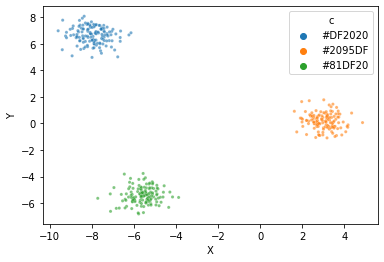

In [471]:
sns.scatterplot(data=balls_data ,x="X", y="Y", hue="c", alpha = 0.6, s=10)

In [472]:
KMeans_SI_list=[]
KMeans_DB_list=[]
KMeans_NMI_list=[]

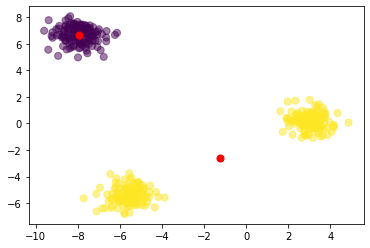

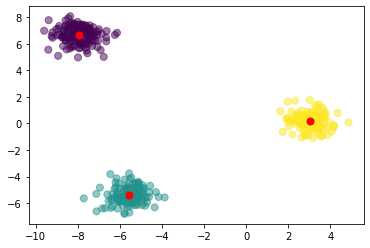

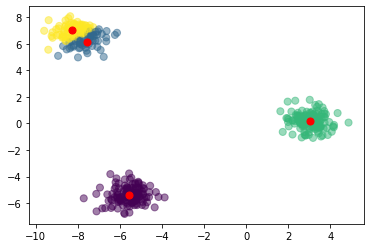

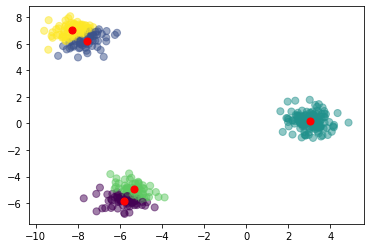

[0.6680032962357081, 0.9015410506497863, 0.710028921603522, 0.5146387848328697]
[0.5228079815570605, 0.13589684789597745, 0.652815286522189, 0.9719648322378912]
[0.7349447022051065, 1.0, 0.9050959672015284, 0.8269902886074602]


In [473]:
KMeans_SI_list=[]
KMeans_DB_list=[]
KMeans_NMI_list=[]
for i in range (2,6) :
    kmeans = KMeans(n_clusters=i).fit(balls_data.drop(['class','c'],axis=1))
    centroids = kmeans.cluster_centers_
    #print(centroids)

    plt.scatter(balls_data['X'], balls_data['Y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.show()
    
    KMeans_NMI_list.append(skmet.normalized_mutual_info_score(balls_data['class'],kmeans.labels_))
    KMeans_DB_list.append(skmet.davies_bouldin_score(balls_data.drop(['class','c'],axis=1), kmeans.labels_))
    KMeans_SI_list.append(skmet.silhouette_score(balls_data.drop(['class','c'],axis=1), kmeans.labels_, metric='euclidean'))
print(KMeans_SI_list)
print(KMeans_DB_list)
print(KMeans_NMI_list)

kmeans = KMeans(n_clusters=8).fit(balls_data.drop(['class','c'],axis=1))
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(balls_data['X'], balls_data['Y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [474]:
def entropy(arr):
    entropy_total=0.0
    for i in range(0,max(arr)+1):
        filter_arr=arr==i
        fraction=len(arr[filter_arr])/len(arr)
        entropy=-1*fraction*(math.log2(fraction))
        entropy_total=entropy_total+entropy
    return entropy_total    

def probability(arr,num,*arg):
    if(len(arg)==0):
        filter_arr=arr==num
        return len(arr[filter_arr])/len(arr)
    else :
        arr_2=arg[0]
        num_2=arg[1]
        count=0;
        for i in range (0,len(arr)):
            if (arr[i]==num and arr_2[i]==num_2) :
                count=count+1
        return count/len(arr)
    
def mutual_information(classes, clusters):
    mut_info=0
    H_Y=entropy(classes) #H(y)
    #I(Y;C)=H_Y-H(Y|C)
    H_YC=0
    for j in range(0,max(clusters)+1):
        P_C=1/len(set(clusters)) #fraction of clusters
        df=pd.DataFrame({"class": classes, "cluster" : clusters})
        
        cluster_size=len(df.loc[df['cluster']==j])
        P_YC=0
        
        for i in range(0,max(classes)+1):
            P_YC_i=len(df.loc[(df['cluster']==j) & ( df['class']==i)])/P_C
            if(P_YC_i !=0) :
                P_YC=P_YC+P_YC_i*math.log2(P_YC_i)
            
        H_YC=H_YC-P_C*P_YC
    return H_Y-H_YC        
            
def NMI(classes,labels) :
    return mutual_information(classes,labels)/((entropy(classes)*entropy(labels))**0.5)
                
           
        
#kmeans = KMeans(n_clusters=3).fit(balls_data.drop(['class','c'],axis=1))
#centroids = kmeans.cluster_centers_
#print(centroids)
#print(kmeans.labels_)
#plt.scatter(balls_data['X'], balls_data['Y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
#plt.show()
    
#entropy(kmeans.labels_)
#kmeans = KMeans(n_clusters=3).fit(balls_data.drop(['class','c'],axis=1))
#NMI(balls_data['class'],kmeans.labels_)

# Spectral

In [475]:
balls_data=pd.read_csv('balls.txt', sep=",", header=None)
balls_data.columns = ["X", "Y", "class"]
balls_data=balls_data.drop(0).reset_index(drop=True)
balls_data[["class","X","Y"]]=balls_data[["class","X","Y"]].apply(pd.to_numeric)
colors = ['#DF2020', '#81DF20', '#2095DF']
balls_data['c'] = balls_data["class"].map({0:colors[0], 1:colors[1], 2:colors[2]})
Spectral_SI_list=[]
Spectral_DB_list=[]
Spectral_NMI_list=[]

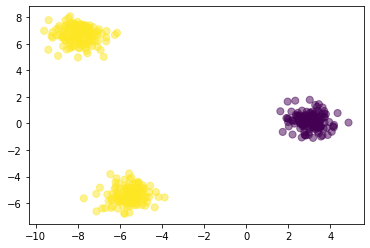

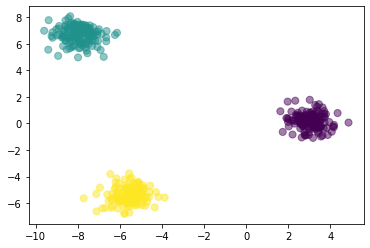

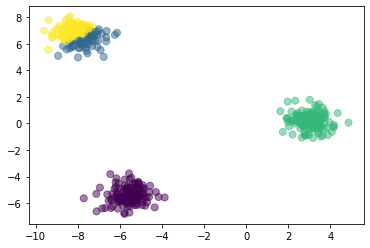

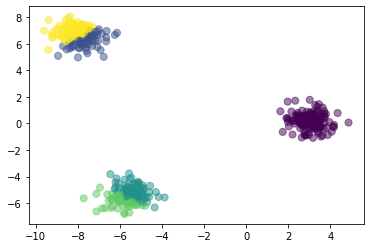

[0.5770377629738668, 0.9015410506497863, 0.7106474080787759, 0.5184852749766597]
[0.7003735443874789, 0.13589684789597745, 0.652624982065799, 0.9603318081994565]
[0.73368840484851, 1.0, 0.905334414581455, 0.8295196086604134]


In [476]:


Spectral_NMI_list=[]
Spectral_SI_list=[]
Spectral_DB_list=[]


for i in range (2,6) :
    clustering=SpectralClustering(n_clusters=i,  n_init=10, gamma=1.0, affinity='rbf',assign_labels='kmeans').fit(balls_data.drop(['class','c'],axis=1))

    plt.scatter(balls_data['X'], balls_data['Y'], c= clustering.labels_.astype(float), s=50, alpha=0.5)
    plt.show()
    
    Spectral_DB_list.append(skmet.davies_bouldin_score(balls_data.drop(['class','c'],axis=1), clustering.labels_))
    Spectral_NMI_list.append(skmet.normalized_mutual_info_score(balls_data['class'], clustering.labels_))
    Spectral_SI_list.append(skmet.silhouette_score(balls_data.drop(['class','c'],axis=1), clustering.labels_, metric='euclidean'))
print(Spectral_SI_list)
print(Spectral_DB_list)
print(Spectral_NMI_list)

# SPIRALS txt
## KMeans

In [477]:
spirals_data=pd.read_csv('spirals.txt', sep=",", header=None)
spirals_data.columns = ["X", "Y", "class"]
spirals_data=spirals_data.drop(0).reset_index(drop=True)
spirals_data[["class","X","Y"]]=spirals_data[["class","X","Y"]].apply(pd.to_numeric)
colors = ['#DF2020', '#81DF20', '#2095DF','#111B45']
spirals_data['c'] = spirals_data["class"].map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})
KMeans_SI_list=[]
KMeans_DB_list=[]
KMeans_NMI_list=[]
spirals_data.head()

,X,Y,class,c
0,31.95,7.95,3,#111B45
1,31.15,7.30,3,#111B45
2,30.45,6.65,3,#111B45
3,29.70,6.00,3,#111B45
4,28.90,5.55,3,#111B45


<AxesSubplot:xlabel='X', ylabel='Y'>

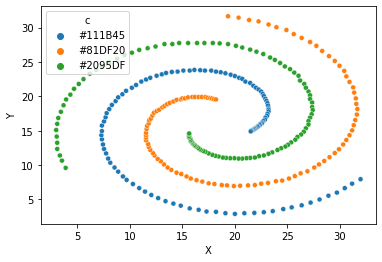

In [478]:
sns.scatterplot(data=spirals_data ,x="X", y="Y", hue="c", alpha = 1, s=25)

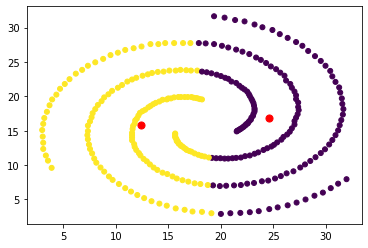

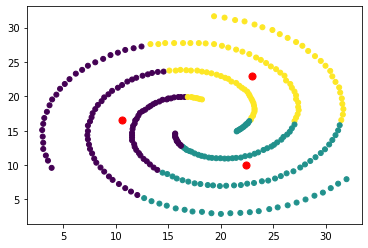

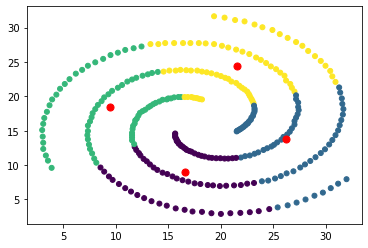

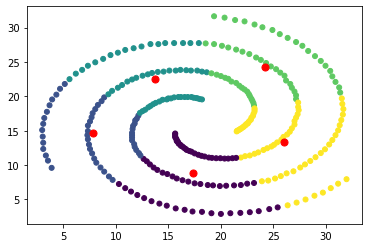

Kmeans SI  [0.3479803648169176, 0.3600414234482207, 0.35419745079720516, 0.3458173387831364]
KMeans DB  [1.1680653689695981, 0.8778725899323329, 0.8807907173614961, 0.8968345504111929]
KMeans NMI  [0.0007639574464418131, 0.0005154832811358417, 0.002721793937328218, 0.006599822806612722]


In [479]:
KMeans_SI_list=[]
KMeans_DB_list=[]
KMeans_NMI_list=[]

for i in range (2,6) :
    kmeans = KMeans(n_clusters=i).fit(spirals_data.drop(['class','c'],axis=1))
    centroids = kmeans.cluster_centers_
    #print(centroids)

    plt.scatter(spirals_data['X'], spirals_data['Y'], c= kmeans.labels_.astype(float), s=25, alpha=1)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.show()
    
    KMeans_DB_list.append(skmet.davies_bouldin_score(spirals_data.drop(['class','c'],axis=1), kmeans.labels_))
    KMeans_NMI_list.append(skmet.normalized_mutual_info_score(spirals_data['class'],kmeans.labels_))
    KMeans_SI_list.append(skmet.silhouette_score(spirals_data.drop(['class','c'],axis=1), kmeans.labels_, metric='euclidean'))
print("Kmeans SI ",KMeans_SI_list)
print("KMeans DB ",KMeans_DB_list)
print("KMeans NMI ",KMeans_NMI_list)

# Spectral for spirals

In [480]:
spirals_data=pd.read_csv('spirals.txt', sep=",", header=None)
spirals_data.columns = ["X", "Y", "class"]
spirals_data=spirals_data.drop(0).reset_index(drop=True)
spirals_data[["class","X","Y"]]=spirals_data[["class","X","Y"]].apply(pd.to_numeric)
colors = ['#DF2020', '#81DF20', '#2095DF','#111B45']
spirals_data['c'] = spirals_data["class"].map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})
Spectral_SI_list=[]
Spectral_DB_list=[]
Spectral_NMI_list=[]
spirals_data.head()


,X,Y,class,c
0,31.95,7.95,3,#111B45
1,31.15,7.30,3,#111B45
2,30.45,6.65,3,#111B45
3,29.70,6.00,3,#111B45
4,28.90,5.55,3,#111B45


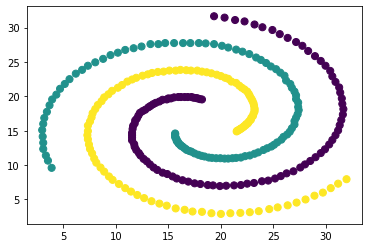

In [481]:
plt.scatter(data=spirals_data ,x="X", y="Y", c=spirals_data['class'].astype(float), alpha = 1, s=50)

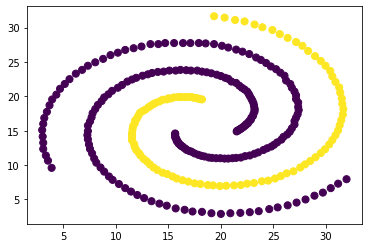

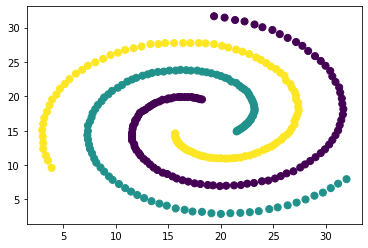

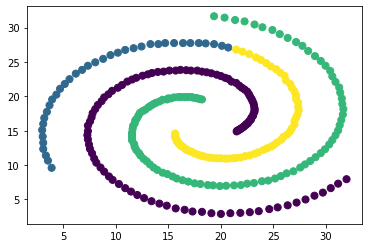

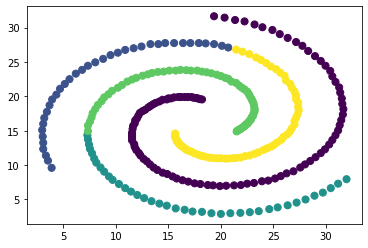

Spectral SI  [0.025327647639310405, 0.0013442973442779936, -0.011778802678526653, 0.015452943268393545]
Spectral DB  [6.314198342299622, 5.882022552277642, 6.9136926313607265, 5.458556431446378]
Spectral NMI  [0.7287351469233798, 1.0, 0.9095789586844116, 0.8325369036537793]


In [482]:
Spectral_SI_list=[]
Spectral_DB_list=[]
Spectral_NMI_list=[]
for i in range (2,6) :
    clustering=SpectralClustering(n_clusters=i,  n_init=10, gamma=1.0, affinity='rbf',assign_labels='kmeans').fit(spirals_data.drop(['class','c'],axis=1))

    plt.scatter(spirals_data['X'],spirals_data['Y'], c= clustering.labels_.astype(float), s=50, alpha=1)
    plt.show()
    
    Spectral_NMI_list.append(skmet.normalized_mutual_info_score(spirals_data['class'], clustering.labels_))
    Spectral_DB_list.append(skmet.davies_bouldin_score(spirals_data.drop(['class','c'],axis=1), clustering.labels_))
    Spectral_SI_list.append(skmet.silhouette_score(spirals_data.drop(['class','c'],axis=1), clustering.labels_, metric='euclidean'))
print("Spectral SI ",Spectral_SI_list)
print("Spectral DB ",Spectral_DB_list)
print("Spectral NMI ",Spectral_NMI_list)
